<a href="https://colab.research.google.com/github/peaceebika/Pattern-Recognition/blob/main/Assignment_01_Linear_Classifiers/code/linear_classifiers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import numpy as np
import matplotlib.pyplot as plt

In [21]:
np.random.seed(42)

mu1 = np.array([2.0, 2.0])
mu2 = np.array([0.0, 0.0])
sigma2 = 2.0
cov = sigma2 * np.eye(2)

n_samples = 200

In [22]:
X1 = np.random.multivariate_normal(mu1, cov, n_samples)
X2 = np.random.multivariate_normal(mu2, cov, n_samples)

y1 = np.ones(n_samples)
y2 = -np.ones(n_samples)

X = np.vstack((X1, X2))
y = np.hstack((y1, y2))

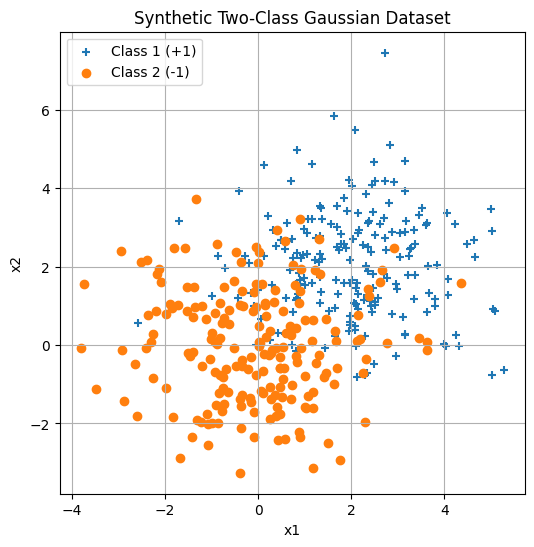

In [23]:
plt.figure(figsize=(6,6))
plt.scatter(X1[:, 0], X1[:, 1], marker='+', label='Class 1 (+1)')
plt.scatter(X2[:, 0], X2[:, 1], marker='o', label='Class 2 (-1)')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Synthetic Two-Class Gaussian Dataset')
plt.legend()
plt.grid(True)
plt.show()

In [24]:
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (400, 2)
y shape: (400,)


**Train / Test split**

In [25]:
from sklearn.model_selection import train_test_split

In [30]:
# Split the data (50 / 50)
X_train_50, X_test_50, y_train_50, y_test_50 = train_test_split(
    X, y,
    train_size=0.5,
    test_size=0.5,
    random_state=42,
    stratify=y
)

In [31]:
print("50% Training / 50% Test")
print("X_train shape:", X_train_50.shape)
print("y_train shape:", y_train_50.shape)
print("X_test shape :", X_test_50.shape)
print("y_test shape :", y_test_50.shape)

50% Training / 50% Test
X_train shape: (200, 2)
y_train shape: (200,)
X_test shape : (200, 2)
y_test shape : (200,)


In [33]:
# 30% Training, 50% Test
X_train_30, X_test_30, y_train_30, y_test_30 = train_test_split(
    X, y,
    train_size=0.3,
    test_size=0.5,
    random_state=42,
    stratify=y
)

In [34]:
print("30% Training / 50% Test")
print("X_train shape:", X_train_30.shape)
print("y_train shape:", y_train_30.shape)
print("X_test shape :", X_test_30.shape)
print("y_test shape :", y_test_30.shape)

30% Training / 50% Test
X_train shape: (120, 2)
y_train shape: (120,)
X_test shape : (200, 2)
y_test shape : (200,)


In [35]:
# Split the data (10 / 50)
X_train_10, X_test_10, y_train_10, y_test_10 = train_test_split(
    X, y,
    train_size=0.1,
    test_size=0.5,
    random_state=42,
    stratify=y
)

In [36]:
print("10% Training / 50% Test")
print("X_train shape:", X_train_10.shape)
print("y_train shape:", y_train_10.shape)
print("X_test shape :", X_test_10.shape)
print("y_test shape :", y_test_10.shape)

10% Training / 50% Test
X_train shape: (40, 2)
y_train shape: (40,)
X_test shape : (200, 2)
y_test shape : (200,)


**Training Perceptron**

In [37]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

In [39]:
def train_and_test_perceptron(X_train, y_train, X_test, y_test, label=""):
    model = Perceptron(
        max_iter=2000,     # enough iterations
        tol=1e-3,          # stop if converged
        random_state=42
    )
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    print(label)
    print("Accuracy:", acc)
    print("w (weights):", model.coef_)
    print("b (bias):", model.intercept_)
    print("-" * 40)

    return model, acc

In [40]:
# Train/Test for 50% training / 50% test
perc_50, acc_50 = train_and_test_perceptron(
    X_train_50, y_train_50, X_test_50, y_test_50,
    label="Perceptron: 50% train / 50% test"
)

Perceptron: 50% train / 50% test
Accuracy: 0.795
w (weights): [[1.87566172 4.2303655 ]]
b (bias): [-2.]
----------------------------------------


In [43]:
# Train/Test for 30% training / 50% test
perc_30, acc_30 = train_and_test_perceptron(
    X_train_30, y_train_30, X_test_30, y_test_30,
    label="Perceptron: 30% train / 50% test"
)

Perceptron: 30% train / 50% test
Accuracy: 0.835
w (weights): [[2.40339981 2.59165438]]
b (bias): [-4.]
----------------------------------------


In [44]:
# Train/Test for 30% training / 50% test
perc_10, acc_10 = train_and_test_perceptron(
    X_train_10, y_train_10, X_test_10, y_test_10,
    label="Perceptron: 10% train / 50% test"
)

Perceptron: 10% train / 50% test
Accuracy: 0.865
w (weights): [[2.69648798 2.86629787]]
b (bias): [-4.]
----------------------------------------


In [46]:
# Summary table
print("SUMMARY (Perceptron Accuracies)")
print("50% train:", acc_50)
print("30% train:", acc_30)
print("10% train:", acc_10)

SUMMARY (Perceptron Accuracies)
50% train: 0.795
30% train: 0.835
10% train: 0.865


In [47]:
# Least Squares classifier

In [48]:
from sklearn.linear_model import LinearRegression

In [50]:
def train_and_test_least_squares(X_train, y_train, X_test, y_test, label=""):
    model = LinearRegression()
    model.fit(X_train, y_train)

    # regression output (real values)
    y_score = model.predict(X_test)

    # convert to class labels using sign
    y_pred = np.where(y_score >= 0, 1, -1)

    acc = accuracy_score(y_test, y_pred)

    print(label)
    print("Accuracy:", acc)
    print("w (weights):", model.coef_)
    print("b (bias):", model.intercept_)
    print("-" * 40)

    return model, acc

In [51]:
# 50% train / 50% test
ls_50, ls_acc_50 = train_and_test_least_squares(
    X_train_50, y_train_50, X_test_50, y_test_50,
    label="Least Squares: 50% train / 50% test"
)

Least Squares: 50% train / 50% test
Accuracy: 0.865
w (weights): [0.26048747 0.24688032]
b (bias): -0.47409406448841374
----------------------------------------


In [52]:
# 30% train / 50% test
ls_30, ls_acc_30 = train_and_test_least_squares(
    X_train_30, y_train_30, X_test_30, y_test_30,
    label="Least Squares: 30% train / 50% test"
)

Least Squares: 30% train / 50% test
Accuracy: 0.855
w (weights): [0.27073547 0.25119017]
b (bias): -0.46721195056715553
----------------------------------------


In [53]:
# 10% train / 50% test
ls_10, ls_acc_10 = train_and_test_least_squares(
    X_train_10, y_train_10, X_test_10, y_test_10,
    label="Least Squares: 10% train / 50% test"
)

Least Squares: 10% train / 50% test
Accuracy: 0.85
w (weights): [0.21574891 0.22735837]
b (bias): -0.495854592821075
----------------------------------------


In [54]:
print("SUMMARY (Least Squares Accuracies)")
print("50% train:", ls_acc_50)
print("30% train:", ls_acc_30)
print("10% train:", ls_acc_10)

SUMMARY (Least Squares Accuracies)
50% train: 0.865
30% train: 0.855
10% train: 0.85


**Train SVM (linear SVM)**

In [55]:
from sklearn.svm import SVC

In [57]:
def train_and_test_svm(X_train, y_train, X_test, y_test, label=""):
    model = SVC(kernel="linear", C=1.0)   # linear SVM
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    print(label)
    print("Accuracy:", acc)
    print("w (weights):", model.coef_)
    print("b (bias):", model.intercept_)
    print("-" * 40)

    return model, acc

In [58]:
# 50% train / 50% test
svm_50, svm_acc_50 = train_and_test_svm(
    X_train_50, y_train_50, X_test_50, y_test_50,
    label="SVM: 50% train / 50% test"
)

SVM: 50% train / 50% test
Accuracy: 0.855
w (weights): [[0.63995109 0.71161885]]
b (bias): [-1.2193128]
----------------------------------------


In [59]:
# 30% train / 50% test
svm_30, svm_acc_30 = train_and_test_svm(
    X_train_30, y_train_30, X_test_30, y_test_30,
    label="SVM: 30% train / 50% test"
)

SVM: 30% train / 50% test
Accuracy: 0.845
w (weights): [[0.79881195 0.92276579]]
b (bias): [-1.38396263]
----------------------------------------


In [60]:
# 10% train / 50% test
svm_10, svm_acc_10 = train_and_test_svm(
    X_train_10, y_train_10, X_test_10, y_test_10,
    label="SVM: 10% train / 50% test"
)

SVM: 10% train / 50% test
Accuracy: 0.86
w (weights): [[0.57095229 0.64550317]]
b (bias): [-1.2859525]
----------------------------------------


In [61]:
print("SUMMARY (SVM Accuracies)")
print("50% train:", svm_acc_50)
print("30% train:", svm_acc_30)
print("10% train:", svm_acc_10)

SUMMARY (SVM Accuracies)
50% train: 0.855
30% train: 0.845
10% train: 0.86


**Final comparison table**

In [62]:
print("FINAL COMPARISON TABLE (Accuracy)")
print("Train%   Perceptron   LeastSquares   SVM")
print("50%     ", acc_50,     "    ", ls_acc_50,   "     ", svm_acc_50)
print("30%     ", acc_30,     "    ", ls_acc_30,   "     ", svm_acc_30)
print("10%     ", acc_10,     "    ", ls_acc_10,   "     ", svm_acc_10)

FINAL COMPARISON TABLE (Accuracy)
Train%   Perceptron   LeastSquares   SVM
50%      0.795      0.865       0.855
30%      0.835      0.855       0.845
10%      0.865      0.85       0.86
